In [63]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [64]:
# Transform the date column to a datetime object
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [65]:
# Feature engineer the date column
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [66]:
# Create a data frame that only has thefts set to 0
df_0 = df[df['thefts'] == 0]

# Create a data frame where thefts are not 0
df_not_0 = df[df['thefts'] != 0]

# Create a dataframe merging df_not_0 and part of df_0
df_0 = df_0.sample(frac=0.4)
df = pd.concat([df_not_0, df_0])

# Sort the dataframe by date
df = df.sort_values(by=['Elapsed'])

df[:40]

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
119,119,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
127,127,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
7,7,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
6,6,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
71,71,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
84,84,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
18,18,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
10,10,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
28,28,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
59,59,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [67]:
# Split the data into train and validation sets where the end of the set is the validation set
splits = EndSplitter(valid_pct=0.2, valid_last=True)(range_of(df))

# Create a TabularPandas object
tabular_pandas = TabularPandas(
    df, procs=[Categorify, Normalize],
    cat_names=["hood_id", "Month", "Week", "Day", "Dayofweek", "Dayofyear", "Is_month_end",
               "Is_month_start", "Is_quarter_end", "Is_quarter_start", "Is_year_end", "Is_year_start"],
    cont_names=["Year"],
    y_names="thefts", y_block=CategoryBlock,
    splits=splits)

tabular_pandas.xs.iloc[:5]


,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year
119,120,1,1,1,4,1,1,2,1,2,1,2,-1.470037
127,128,1,1,1,4,1,1,2,1,2,1,2,-1.470037
7,8,1,1,1,4,1,1,2,1,2,1,2,-1.470037
6,7,1,1,1,4,1,1,2,1,2,1,2,-1.470037
71,72,1,1,1,4,1,1,2,1,2,1,2,-1.470037


In [68]:
# Set the batch size
data_loader = tabular_pandas.dataloaders()
data_loader.show_batch()

,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year,thefts
0,17,5,21,21,1,141,False,False,False,False,False,False,2019.0,0
1,139,1,4,22,0,22,False,False,False,False,False,False,2018.0,1
2,150,10,43,27,6,300,False,False,False,False,False,False,2019.0,0
3,142,6,26,25,1,176,False,False,False,False,False,False,2019.0,0
4,50,3,13,28,5,87,False,False,False,False,False,False,2015.0,1
5,153,4,18,30,3,120,True,False,False,False,False,False,2015.0,0
6,100,2,7,15,5,46,False,False,False,False,False,False,2020.0,1
7,152,5,18,4,5,124,False,False,False,False,False,False,2019.0,0
8,44,9,38,14,0,258,False,False,False,False,False,False,2020.0,0
9,75,12,50,13,6,347,False,False,False,False,False,False,2015.0,0


In [41]:
# Create a model with cross entropy loss
learn = tabular_learner(data_loader, y_range=(0,4) metrics=accuracy)


In [69]:
# Train the model
learn.fit_one_cycle(2)


epoch,train_loss,valid_loss,accuracy,time
0,0.605859,0.601313,0.745913,01:20
1,0.600398,0.603882,0.746204,01:20


In [70]:
# Show the results
learn.show_results(max_n=500, shuffle=True)


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts,thefts_pred
0,68,0,8,31,3,2,215,1,1,1,1,1,1,0,0
1,67,0,12,49,6,1,340,1,1,1,1,1,1,0,0
2,140,0,9,37,19,7,262,1,1,1,1,1,1,0,0
3,24,0,3,10,12,6,71,1,1,1,1,1,1,0,0
4,157,0,6,24,15,2,166,1,1,1,1,1,1,0,0
5,113,0,5,18,6,4,126,1,1,1,1,1,1,0,0
6,6,0,5,21,25,2,145,1,1,1,1,1,1,0,0
7,125,0,3,12,26,6,85,1,1,1,1,1,1,1,0
8,25,0,7,29,22,4,203,1,1,1,1,1,1,0,0
9,89,0,8,33,21,6,233,1,1,1,1,1,1,0,0


In [71]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[6.9627e-01, 2.7504e-01, 2.6365e-02, 2.1782e-03, 1.3730e-04, 2.1824e-06],
        [5.9712e-01, 3.5624e-01, 4.2681e-02, 3.7893e-03, 1.7717e-04, 8.4423e-07],
        [8.6486e-01, 1.2854e-01, 6.3962e-03, 1.9144e-04, 9.3890e-06, 1.8009e-07],
        ...,
        [1.9681e-01, 5.6172e-01, 2.1776e-01, 2.2276e-02, 1.4359e-03, 4.1826e-07],
        [8.2531e-01, 1.6600e-01, 8.3172e-03, 3.5920e-04, 2.0585e-05, 3.8697e-07],
        [9.9418e-01, 5.4595e-03, 3.2446e-04, 3.3878e-05, 3.0860e-06, 1.0243e-07]])
tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]], dtype=torch.int8)


In [72]:
# Get the highest value from the predictions tensor
preds = preds.argmax(dim=-1)
print(preds)

tensor([0, 0, 0,  ..., 1, 0, 0])


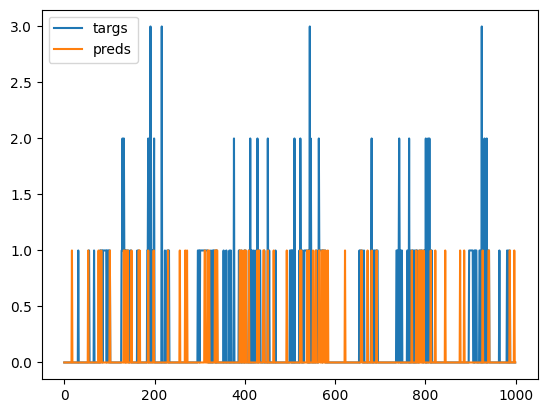

In [73]:
# Plot only the highest predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:].numpy(), label='targs')
plt.plot(preds[-1000:].numpy(), label='preds')
plt.legend()
plt.show()

In [74]:
# With sckiit-learn calculate the mean squared error and accuracy
from sklearn.metrics import mean_squared_error, accuracy_score

# Round the predictions to the nearest integer
preds = np.round(preds)

print('Mean squared error: ', mean_squared_error(targs, preds))
print('Accuracy: ', accuracy_score(targs, preds))

Mean squared error:  0.32116823674714845
Accuracy:  0.7462039570871576


In [ ]:
# Export the model
learn.export('./exported_models/74_fill_imbalance.pkl')